Dataset: [data.world](https://data.world/healthdatany/r2m7-fr63/workspace/file?filename=potentially-avoidable-antibiotic-prescribing-rates-for-acute-respiratory-infection-by-provider-count-1.csv)



In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np 
import plotly.express as px

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/content/potentially-avoidable-antibiotic-prescribing-rates-for-acute-respiratory-infection-by-provider-count-1.csv')
df.head()

,Year,Provider County,Index Visits,Visits w/ Antibiotic Prescribed,Observed Prescribing Rate per 100 Visits,Risk Adjusted Prescribing Rate per 100 Visits
0,2016,ALBANY,2768,221,7.98,8.41
1,2016,ALLEGANY,432,119,27.55,15.97
2,2016,BRONX,20637,1297,6.28,7.72
3,2016,BROOME,2823,386,13.67,11.10
4,2016,CATTARAUGUS,437,107,24.49,15.29


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           441 non-null    int64  
 1   Provider County                                441 non-null    object 
 2   Index Visits                                   441 non-null    int64  
 3   Visits w/ Antibiotic Prescribed                441 non-null    int64  
 4   Observed Prescribing Rate per 100 Visits       441 non-null    float64
 5   Risk Adjusted Prescribing Rate per 100 Visits  441 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 20.8+ KB


In [4]:
df.columns

Index(['Year', 'Provider County', 'Index Visits',
       'Visits w/ Antibiotic Prescribed',
       'Observed Prescribing Rate per 100 Visits',
       'Risk Adjusted Prescribing Rate per 100 Visits'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=441, step=1)

In [6]:
df["Provider County"] = df["Provider County"].str.capitalize()
df["Provider County"].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New york', 'Niagara', 'Oneida', 'Onondaga', 'Ontario',
       'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens',
       'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady',
       'Schoharie', 'Schuyler', 'Seneca', 'Statewide', 'Steuben',
       'St lawrence', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins',
       'Ulster', 'Warren', 'Washington', 'Wayne', 'Westchester',
       'Wyoming', 'Yates'], dtype=object)

In [7]:
selected_countries = df['Provider County'].sample(10, replace=True).tolist()
selected_countries

['Warren',
 'Wyoming',
 'Seneca',
 'Bronx',
 'Sullivan',
 'Nassau',
 'Oneida',
 'Suffolk',
 'Erie',
 'Yates']

In [8]:
print(df["Observed Prescribing Rate per 100 Visits"].min())
print(df["Observed Prescribing Rate per 100 Visits"].max())

4.44
100.0


In [9]:
fig = px.bar(
    df[df['Provider County'].isin(selected_countries)], 
    x = 'Provider County',
    y = "Observed Prescribing Rate per 100 Visits", 
    color = "Provider County",
    animation_frame = "Year",
    animation_group = "Provider County", 
    range_y = [0, 100], 
    title = 'Antibiotic Prescribing rates in US counties'
)
fig.show()

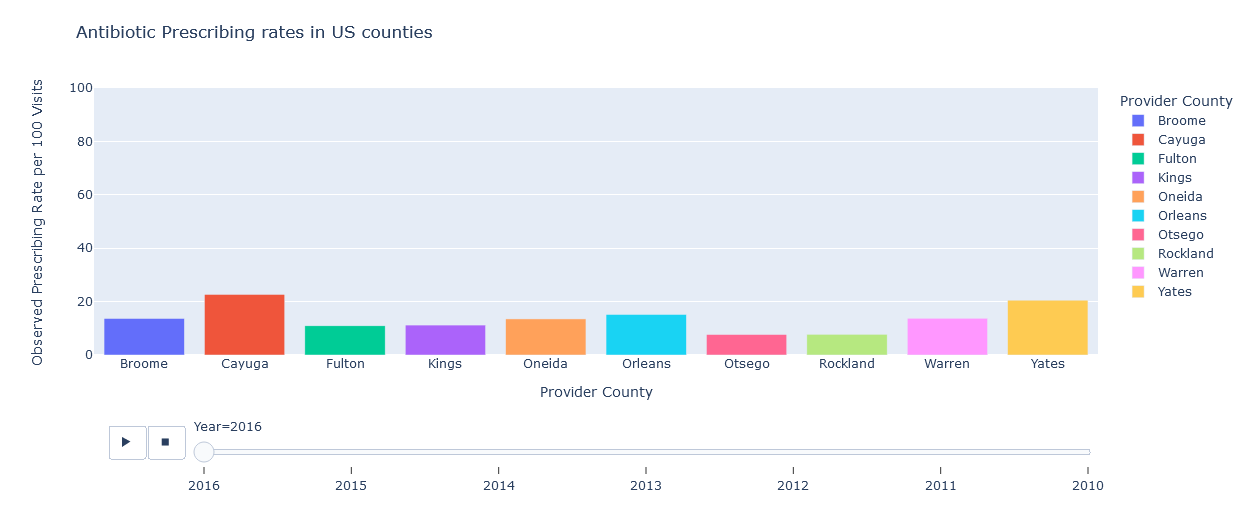